# Prepare word2vec

In [1]:
import word2vec, sys, os, math
import pickle as pkl
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
word2vec_bin_loc = '/media/mrmad/283d233c-d7d8-4bd6-830b-25f7c7a665f0/mrmad/Documents/Essex/Thesis/vivan/Neuro_Agent/scholar/untagged_wikipedia_for_word2vec.bin'

In [3]:
def load_word2vec(model_filename):
    model = word2vec.load(model_filename)
    return model

In [4]:
word_vectors = load_word2vec(word2vec_bin_loc)

In [5]:
# check if works
word_vectors['trump']

array([ 0.01308811, -0.07988005,  0.10500788,  0.07100031, -0.07165847,
        0.11938906,  0.0280553 ,  0.14792797,  0.23113307,  0.01723865,
        0.03450589, -0.07995256, -0.05783403,  0.03983924, -0.1888995 ,
       -0.09949619, -0.03393186,  0.11679307,  0.18283083,  0.08827897,
        0.03169184,  0.01546468,  0.1338411 , -0.02819854, -0.01757766,
       -0.04990632,  0.1517567 , -0.11641905, -0.00338179,  0.02553399,
       -0.02359519, -0.12224154, -0.04414155, -0.02390066, -0.08413405,
        0.0203083 ,  0.07319663,  0.08502512,  0.1577934 , -0.12009872,
       -0.01799029, -0.01995073,  0.26017562, -0.12101247,  0.00133403,
        0.03656866, -0.13598526, -0.22576216, -0.04886628,  0.01520873,
        0.03005804, -0.03202747, -0.01397827, -0.09020092, -0.03266959,
        0.19127548, -0.20276776, -0.08222742,  0.05252043,  0.01709458,
        0.00267752,  0.06112841,  0.10025077, -0.00340389,  0.06422501,
       -0.11270928, -0.08901594,  0.14634514,  0.10648733, -0.03

# TRY NEW METHOD . it works
from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne/notebook

# Function to plot the words in TSNE

In [6]:
def tsne_plot(model,tokens,labels):
    "Creates and TSNE model and plots it"  
    #tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_model = TSNE(perplexity=40, n_components=2, n_iter=4000)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Function to plot the words seen before the game

# The words seen during the games are in:

In [7]:
with open('./finalruns/run_3/words_seen_detective_pop50gen500_170818.pkl', 'rb') as i:
    x = pkl.load(i)

In [8]:
len(x)

80

In [9]:
before_labels = []
before_tokens = []

for y in x:
    label = x[y]
    before_tokens.append(word_vectors.vectors[label])
    before_labels.append(word_vectors.vocab[label])

In [10]:
len(before_tokens)

80

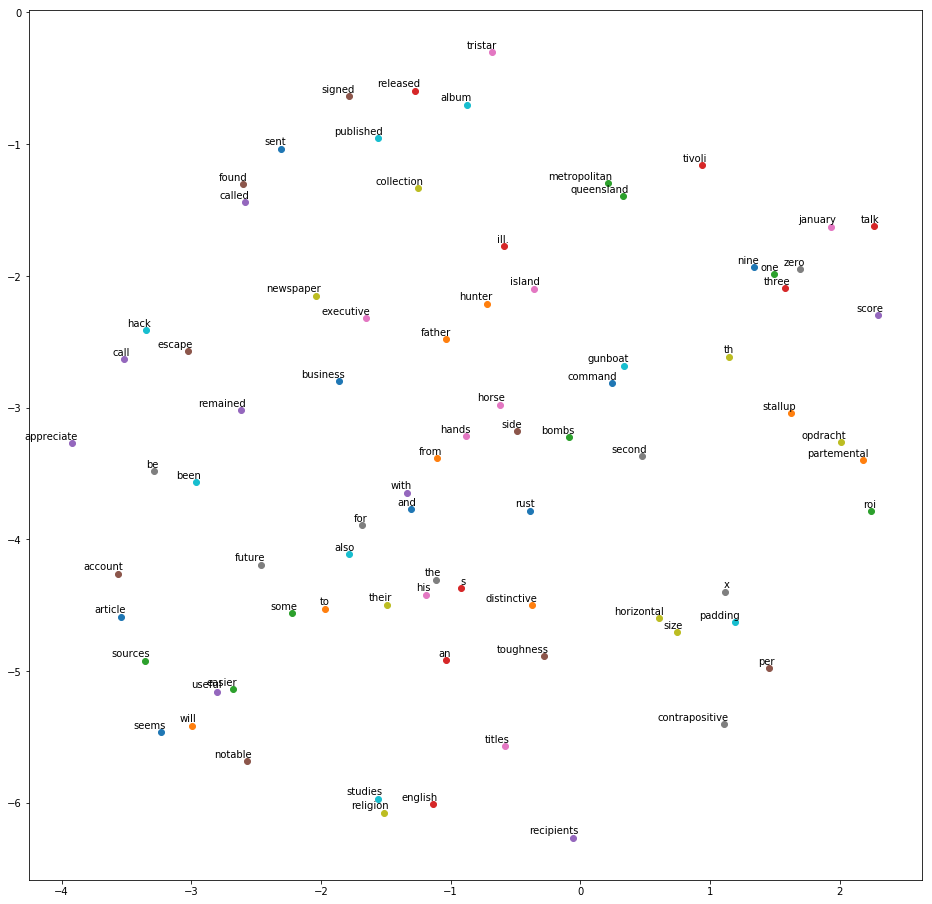

In [11]:
tsne_plot(word_vectors,before_tokens,before_labels)

# The plot of words seen during the games are:

In [13]:
import pickle as pkl
import pandas as pd

In [12]:
with open('./finalruns/run_3/test_word_seen_vectors_detective_pop50gen500_170818.pkl', 'rb') as f:
    tokens = pkl.load(f)

In [13]:
tokens[:1]

[array([-9.99934614e-01, -3.54155064e-01, -1.00000000e+00, -1.00000000e+00,
        -3.42829227e-02, -1.00000000e+00, -1.00000000e+00, -9.63325679e-01,
        -9.99958336e-01, -1.00000000e+00, -9.77211475e-01, -6.97450876e-01,
        -2.05983400e-01, -7.67629862e-01, -6.38508677e-01, -3.61981928e-01,
        -7.33314991e-01, -7.02534437e-01, -9.99863625e-01, -9.95848358e-01,
        -2.13003814e-01, -9.99999940e-01,  8.94398689e-02, -1.00000000e+00,
        -1.00000000e+00, -1.63113654e-01, -1.00000000e+00, -6.81863964e-01,
         2.34073877e-01, -9.45752144e-01,  3.28911781e-01, -9.82663333e-01,
        -1.00000000e+00,  5.23298025e-01, -2.72071898e-01, -9.96959507e-01,
        -6.50163770e-01, -9.99999523e-01, -4.71885562e-01, -8.94703388e-01,
        -1.00000000e+00, -1.00000000e+00,  8.45014215e-01, -1.00000000e+00,
        -1.00000000e+00,  8.42738271e-01, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -5.40086150e-01, -1.00000000e+00,
        -1.0

In [14]:
with open('./finalruns/run_3/test_word_seen_vocab_detective_pop50gen500_170818.pkl', 'rb') as g:
    labels = pkl.load(g)

In [15]:
labels[:1]

['a_DT']

In [16]:
len(labels)

80

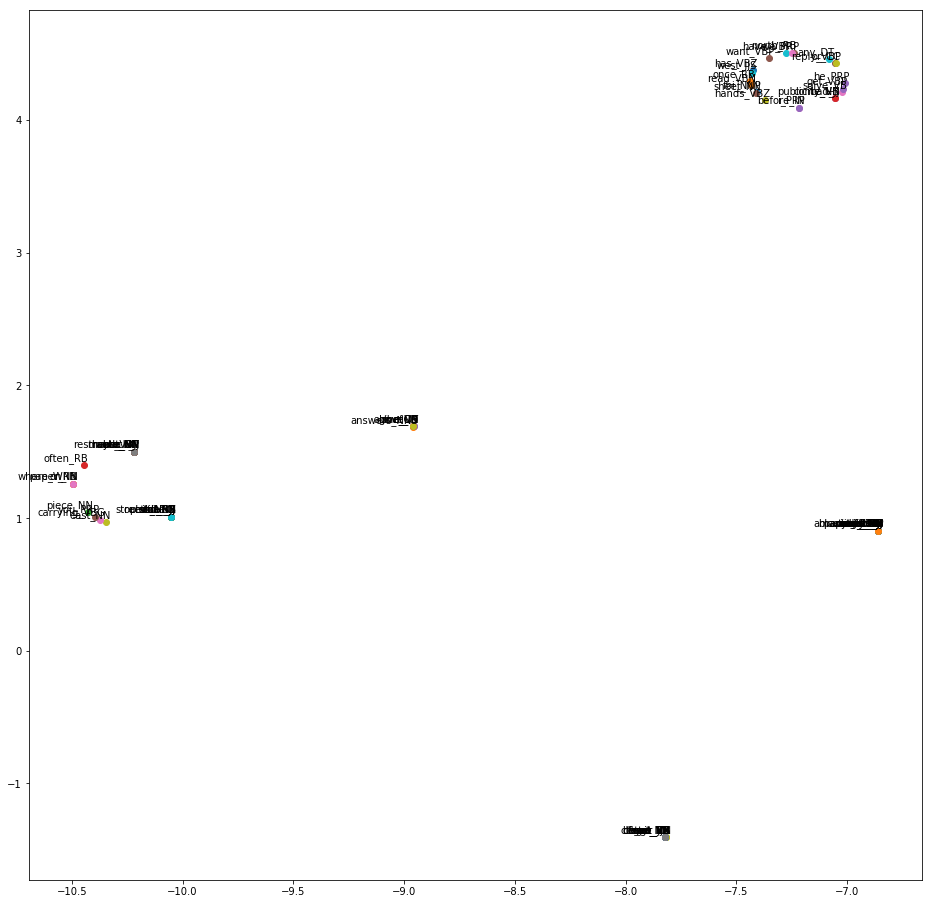

In [17]:
tsne_plot(word_vectors,tokens,labels)